In [162]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

### 1 a and c)

In [163]:
def g(x,y):
    return np.cos(2*np.pi*x)#np.sin(2*np.pi*y) #x**5 + y**5

def f(x,y,a,r):
    return (a+1)*4*np.pi**2*np.cos(2*np.pi*x)#r**2*(2*np.pi)**2*np.sin(2*np.pi*y)  #-((a+1)*20*x**3 + r**2*20*y**3)

def u(x,y):
    return g(x,y)

def u_computed(M):
    x,y = init_grid(M)
    ucomp = np.zeros((M+1,M+1))
    for i in range(0,M+1):
        for j in range(0,M+1):
            ucomp[i][j] = u(x[j],y[i])

    return ucomp


def init_grid(M):
    x=np.linspace(0,1,M+1)
    y=np.linspace(0,2,M+1)
    return x,y

def init_boundary(M,x,y):
    BC = np.zeros((M+1,M+1))
    for i in range(0,M+1):
        BC[i][0] = g(x[0],y[i])
        BC[i][M] = g(x[M], y[i])

    for j in range(0,M+1):
        BC[0][j] = g(x[j],y[0])
        BC[M][j] = g(x[j], y[M])

    return BC

def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

def init_A(M,a):
    A = tridiag(a,-2*(a+1),a,(M-1)**2)
    id_lower = tridiag(1,0,0,M-1)
    id_upper = tridiag(0,0,1,M-1)
    for i in range(0,M-2):
        A[(i)*(M-1):(i+1)*(M-1),(i+1)*(M-1):(i+2)*(M-1)]=id_upper
        A[(i+1)*(M-1):(i+2)*(M-1),(i)*(M-1):(i+1)*(M-1)]=id_lower
    return A

def init_fvec(M,a,r,x,y):
    fvec = np.zeros((M-1,M-1))
    for i in range(1,M):
        for j in range(1,M):
            fvec[i-1][j-1] = f(x[j],y[i],a,r)
            
    return fvec.flatten()

def init_bvec(M,U,a):
    b_left_right = np.zeros((M-1)*(M-1))
    b_bottom_top = np.zeros((M-1)*(M-1))

    for i in range(1,M):
        b_left_right[(M-1)*(i-1)] = a*U[i][0] + U[i-1][0]
        b_left_right[(M-2)+ (M-1)*(i-1)] = a*U[i][M] + U[i+1][M]

    for j in range(2,M):
        b_bottom_top[j-1] = U[0][j-1]
        b_bottom_top[(M-1)*(M-2)+(j-2)] = U[M][j]

    return b_bottom_top + b_left_right


In [164]:
def solver(M,a,r):
    h = 1/M

    x,y = init_grid(M)
    U = init_boundary(M,x,y)
    A = init_A(M,a)
    f = init_fvec(M,a,r,x,y)
    b = init_bvec(M,U,a)

    rhs = -(h**2)*f - b

    numapp = np.linalg.solve(A,rhs)

    U[1:-1,1:-1]=numapp.reshape((M-1,M-1))

    return U,x,y

In [165]:
def convergence(a,r):
    P = 4
    Hconv = np.zeros(P)
    Econv = np.zeros(P)
    M = 4 #Has to be changed to 6 for trig
    for p in range(P):
        U,x,y = solver(M,a,r)
        Eh = u_computed(M) - U
        Hconv[p] = (x[1]-x[0])
        Econv[p] = np.max(np.abs(Eh))
        M = 2*M
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    return Hconv, Econv, order

def conv_plot(a,r):
    H, E, p = convergence(a,r)
    plt.loglog(H,E,'o-', label='p={:.2f}'.format(p))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.legend()

In [166]:
def plotter(matrix, x, y):
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot a basic wireframe.
    ax.plot_wireframe(X, Y, matrix,color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    #plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
    plt.show()
    
    return 0

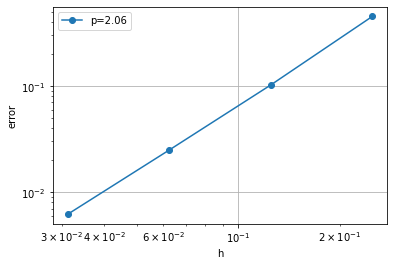

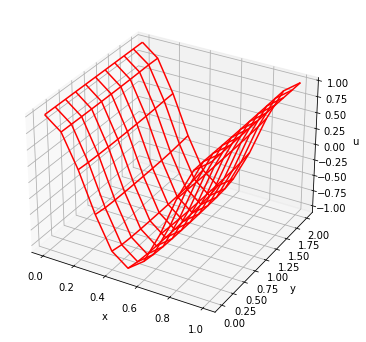

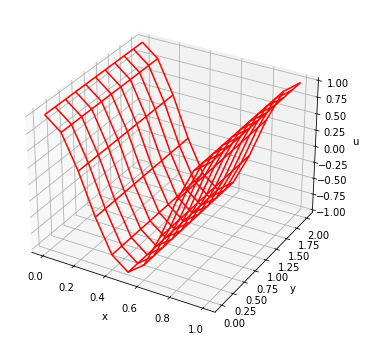

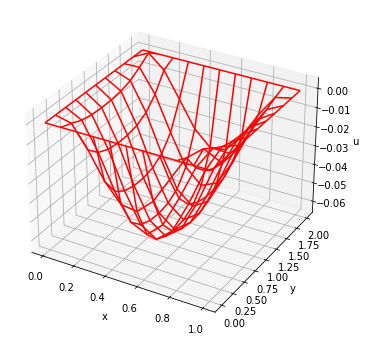

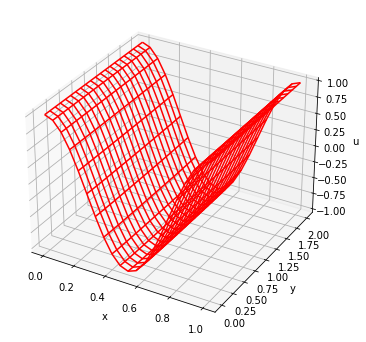

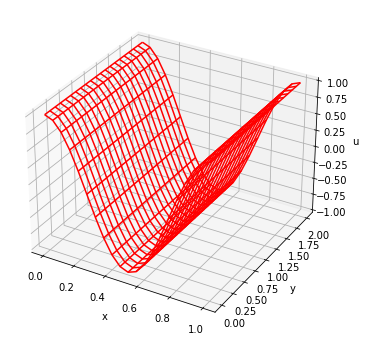

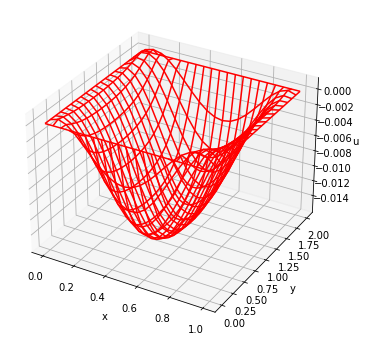

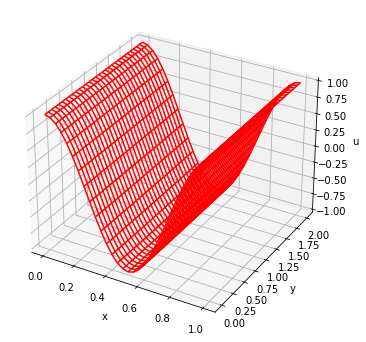

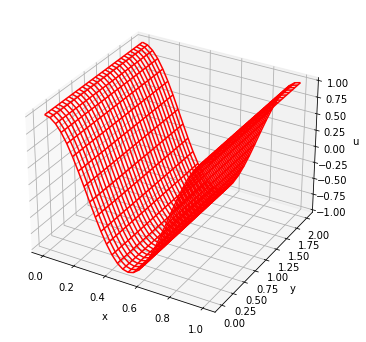

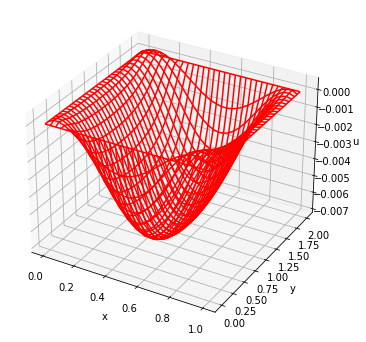

0

In [167]:
def main():
    M = 5
    a =4
    r = 2

    conv_plot(a,r)

    for i in range(1,4):
        app,x,y = solver(M*(i*2),a,r)
        ucmp = u_computed(M*(i*2))
        error = app-ucmp

        plotter(app, x, y), plotter(ucmp, x, y), plotter(error, x, y)

    return 0

main()

### d)

In [168]:
def u_computed_d(M, N,k):
    x,y = init_grid_d(M,N,k)
    ucomp = np.zeros((N+1,M+1))
    for i in range(0,N+1):
        for j in range(0,M+1):
            ucomp[i][j] = u(x[j],y[i])

    return ucomp


def init_grid_d(M,N,k):
    x=np.linspace(0,1,M+1)
    y=np.linspace(0, k*N,N+1)
    return x,y

def init_boundary_d(M,N,x,y):
    BC = np.zeros((N+1,M+1))
    for i in range(0,N+1):
        BC[i][0] = g(x[0],y[i])
        BC[i][M] = g(x[M], y[i])

    for j in range(0,M+1):
        BC[0][j] = g(x[j],y[0])
        BC[N][j] = g(x[j], y[N])

    return BC

def tridiag_d(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

def init_A_d(M,N,a):
    A = tridiag(a,-2*(a+1),a,(M-1)*(N-1))
    id_lower = tridiag_d(1,0,0,M-1)
    id_upper = tridiag_d(0,0,1,M-1)
    for i in range(0,N-2):
        A[(i)*(M-1):(i+1)*(M-1),(i+1)*(M-1):(i+2)*(M-1)]=id_upper
        A[(i+1)*(M-1):(i+2)*(M-1),(i)*(M-1):(i+1)*(M-1)]=id_lower
    
    return A

def init_fvec_d(M,N,a,r,x,y):
    fvec = np.zeros((N-1,M-1))
    for i in range(1,N):
        for j in range(1,M):
            fvec[i-1][j-1] = f(x[j],y[i],a,r)
            
    return fvec.flatten()

def init_bvec_d(M,N,U,a):
    b_left_right = np.zeros((N-1)*(M-1))
    b_bottom_top = np.zeros((N-1)*(M-1))

    for i in range(1,N):
        b_left_right[(M-1)*(i-1)] = a*U[i][0] + U[i-1][0]
        b_left_right[(M-2)+ (M-1)*(i-1)] = a*U[i][M] + U[i+1][M]

    for j in range(2,M):
        b_bottom_top[j-1] = U[0][j-1]
        b_bottom_top[(M-1)*(N-2)+(j-2)] = U[N][j]
        #b_bottom_top[i]=U[0][i]#Bottom Boundary
        #b_bottom_top[-i-1]=U[N][M-i]#

    return b_bottom_top + b_left_right


In [169]:
def solver_d(M,a,r):
    h = 1/M
    h=1/M
    k=r*h
    N=int(np.floor(2/k)+1)


    x,y = init_grid_d(M,N,k)
    U = init_boundary_d(M,N,x,y)
    A = init_A_d(M,N,a)
    f = init_fvec_d(M,N,a,r,x,y)
    b = init_bvec_d(M,N,U,a)

    rhs = -(h**2)*f - b

    numapp = np.linalg.solve(A,rhs)

    U[1:-1,1:-1]=numapp.reshape((N-1,M-1))

    return U,x,y,N,k

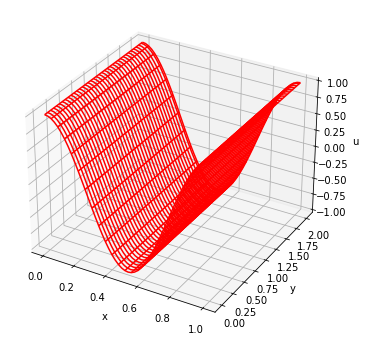

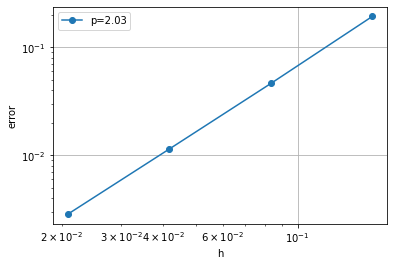

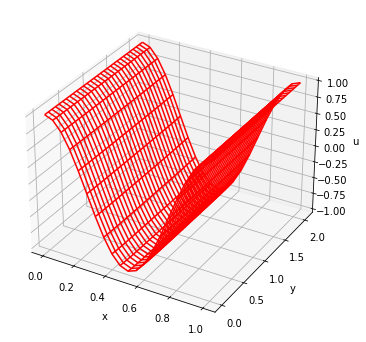

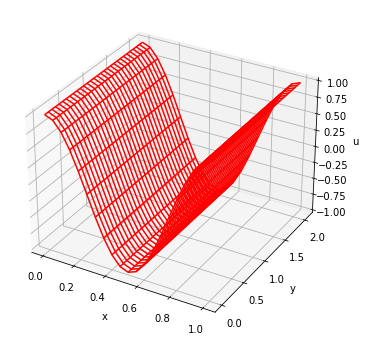

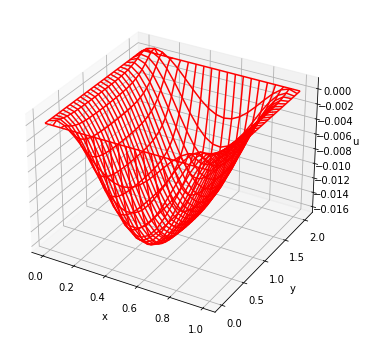

0

In [170]:
U,x,y,N,k=solver_d(50,4,np.sqrt(2))
plotter(U,x,y)

def convergence_d(a,r):
    P = 4
    Hconv = np.zeros(P)
    Econv = np.zeros(P)
    M = 6
    for p in range(P):
        U,x,y,N,k = solver_d(M,a,r)
        Eh = u_computed_d(M,N,k) - U
        Hconv[p] = (x[1]-x[0])
        Econv[p] = np.max(np.abs(Eh))
        M = 2*M
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    return Hconv, Econv, order

def conv_plot_d(a,r):
    H, E, p = convergence_d(a,r)
    plt.loglog(H,E,'o-', label='p={:.2f}'.format(p))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.legend()

def main_d():
    M = 5
    a =4
    r = np.sqrt(2)

    conv_plot_d(a,r)

    for i in range(2,3):
        app,x,y,N,k = solver_d(M*(i*2),a,r)
        ucmp = u_computed_d(M*(i*2),N,k)
        error = app-ucmp

        plotter(app, x, y), plotter(ucmp, x, y), plotter(error, x, y)

    return 0

main_d()

### 2)

In [171]:
def tridiag2_fat(N,x,y):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    x=x[1:-1]
    y=y[1:-1]
    e = np.ones(N)  # array [1,1,...,1] of length N
    f = np.ones(N**2)
    T= 1*np.diag(f[1:],-1)-4*np.diag(f)+1*np.diag(f[1:],1)
    I_R=np.diag(e)
    I_L=np.diag(e)
   
    for i in range(N-1):
        T[i*N:(i+1)*N,(i+1)*N:(i+2)*N]=I_R
    for i in range(1,N):
        T[i*N:(i+1)*N,(i-1)*N:(i)*N]=I_L

    for i in range(len(x)):
        for j in range(len(y)):
             if (U[j][i]!=0):
                T[j*N+i-1:j*N+i,:] = np.zeros(N**2)
                T[j][j]=1
                #break
                
    return T

def g2(x,y):
    return 1/2*x**3+1/3*y**4    #np.cos(2*np.pi*x) + np.sin(2*np.pi*y)

def f2(x,y):
    return (3*(x)+ 4*y**2)   #120*(x**(3/2)+y**(2/3))#Nvnsr = 10
#
#h = 1/N


def BCs2(U,x,y):
    for i in range(len(x)):
        U[0][i]=g(x[i], y[0])
        U[-1][i]=g(x[i], y[-1])
    for i in range(len(y)):
        U[i][0]=g(x[0], y[i])
        U[i][-1]=g(x[-1], y[i])
    return U
def f_vector2(f,x,y,N,h,a,r):
    fvec = np.zeros((N-1,N-1))
    for j in range (0,N-1):
        for i in range (0,N-1):  
            fvec[j][i] = -h**2*f(x[i+1],y[j+1]) 
    return fvec.flatten()


def b_vector2(U,N,x,y,a):
    bx = np.zeros((N-1)*(N-1))
    by = np.zeros((N-1)*(N-1))
    
  
    for i in range (1,N):
        bx[(N-1)*(i-1)]=U[i][0]*a
        bx[N-2+(N-1)*(i-1)]=U[i][N]*a  
    for i in range (0,N-1):
        by[i]=U[0][i+1]#Bottom Boundary
        by[i+(N-1)*(N-2)]=U[N][i+1]#

    b = bx+by
    
    return b

def fatten_BCs(U,x,y,h):
    for i in range(len(x)):
        y_1=np.ceil((1-x[i]**2)/h)*h
        U[y_1][i]=g2(x[i],y[y_1])
    return 0



In [172]:
def solver_2(M=5):
    h=1/M
    k=2*h
    a=2
    r=2
    #boundary=np.array()
    #
    x=np.linspace(0,1,M+1)
    y=np.linspace(0,1,M+1)

    Solution=np.zeros((M+1,M+1))
    U_inner=np.zeros((M-1,M-1))
    U=BCs2(Solution,x,y)
    """for i in range(len(x)):
        for j in range(len(y)):
             if (U[j][i]!=0):
    """             
    A=tridiag2_fat(M-1,x,y)
    #print(U)
    print(A)
    #print(f_vector(f, x, y,N,h))
    f_v=f_vector2(f2, x, y, M, h,a,r)
    b=b_vector2(U,M,x,y,a)
    U[1:-1,1:-1]=np.linalg.solve(A,f_v-b).reshape((M-1,M-1))
    # plt.ply(A)
    
    #U1=BCs(Solution,x,y)
    U_exact=np.zeros((M+1,M+1))
    for i in range(len(y)):
        for j in range(len(x)):
            U_exact[i][j]=g(x[j],y[i])
  
    return x,y,U,U_exact
#solver_2() There is an error when running this code.